# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_users = pd.read_csv("/datasets/megaline_users.csv")
df_calls = pd.read_csv("/datasets/megaline_calls.csv")
df_messages = pd.read_csv("/datasets/megaline_messages.csv")
df_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_plans = pd.read_csv("/datasets/megaline_plans.csv")

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas

df_plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Revisando la información del dataset "Tarifas", en la información general, se observa que es una tabla con poca información (2 registros), se analiza la información tanto de la tabla (configuración), como también los datos que se encuentran almacenados. Se puede observarque no hay datos ausentes, ni nulos, los registros que se encuentran como object, estan todos en minúscula, por lo que no representa un tema a modificar. Lo que si se observa es que en las columnas que representan costos, de las cuatro columnas, dos son tipo entero, y dos son tipo float, por lo que es necesario corregir y unificar el tipo de datos

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
df_plans['usd_monthly_pay']=df_plans['usd_monthly_pay'].astype(float)
df_plans['usd_per_gb']=df_plans['usd_per_gb'].astype(float)
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      float64
 4   usd_per_gb             2 non-null      float64
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(4), int64(3), object(1)
memory usage: 256.0+ bytes


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios

df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios

df_users.sample(30)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
47,1047,Yuk,French,22,"Indianapolis-Carmel-Anderson, IN MSA",2018-06-16,ultimate,NaN
368,1368,Enola,Ray,60,"Pittsburgh, PA MSA",2018-05-20,ultimate,NaN
408,1408,Alaine,Robertson,40,"Baltimore-Columbia-Towson, MD MSA",2018-01-11,surf,NaN
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaN
199,1199,Antonetta,Finley,39,"San Antonio-New Braunfels, TX MSA",2018-08-01,ultimate,NaN
301,1301,Tomas,Horton,64,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-01-04,ultimate,NaN
384,1384,Dominique,Good,36,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-06-09,ultimate,NaN
56,1056,Denis,Chandler,33,"Cincinnati, OH-KY-IN MSA",2018-03-01,surf,NaN
37,1037,Reena,Velazquez,20,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-11,ultimate,NaN
428,1428,Asuncion,Conrad,66,"Phoenix-Mesa-Chandler, AZ MSA",2018-10-23,surf,NaN


En general los dataframes antes tratados no cuentan con muchas inconsistencias, sin embargo, se encontraron algunos detalles que se tuvieron que tratar, como en el caso del df plans, se detecta que las columnas de internet, en una se maneja Mb incluidos, y otra columna se maneja el costo por Gb, por lo tanto hay que tener cuidado a la hora de realizar calculos, para hacer la conversión adecuada y los cálculos sean los correctos. En el caso del df users, se detecta que hay valores nulos en la columna churn date, sin embargo estos no se tratarán, ya que el valor nulo lo más probable es que se deba a que el usuario no ha realizado la cancelación del plan. Así mismo, se detecta que en df plans, se encuentran 4 columnas que manejan costos, sin embargo dos de las columnas cuentan con un tipo de datos int, y las otras dos su tipo de datos es float, al manejarse costos es necesario que su tipo de datos sea float, por lo que se unifican los tipos de datos a float. También se detecta que en df users se encuentran columnas que muestran fechas, sin embargo su tipo de datos se marca como object, por lo que es necesario tratar este detalle, y cambiarlo a tipo fecha.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
df_users['reg_date']=pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')
df_users['churn_date']= pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
df_users['reg_month']=df_users['reg_date'].dt.month
df_users['reg_day']=df_users['reg_date'].dt.day
df_users.sample(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_month,reg_day
417,1417,Jorge,Madden,51,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-06-22,ultimate,NaT,6,22
490,1490,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaT,1,20
193,1193,Lacresha,Olsen,18,"Houston-The Woodlands-Sugar Land, TX MSA",2018-07-07,surf,NaT,7,7
187,1187,Tanner,Goodman,49,"Austin-Round Rock-Georgetown, TX MSA",2018-02-20,surf,NaT,2,20
192,1192,Korey,Goodwin,36,"Buffalo-Cheektowaga, NY MSA",2018-10-02,surf,NaT,10,2
380,1380,Lajuana,Kelley,35,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-09-04,ultimate,NaT,9,4
330,1330,Tobi,Kinney,48,"Las Vegas-Henderson-Paradise, NV MSA",2018-11-06,ultimate,NaT,11,6
252,1252,Mitsue,York,27,"Detroit-Warren-Dearborn, MI MSA",2018-06-10,surf,NaT,6,10
165,1165,Nigel,Huber,20,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-10-27,surf,NaT,10,27
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,8,3


In [10]:
#Se verifica que no haya datos completamente duplicados

df_users['user_id'].duplicated().sum()

0

In [11]:
#Verificar valores ausentes en churn_date

df_users['churn_date'].isna().sum()

466

In [12]:
df_users['reg_month'].isna().sum()

0

## Llamadas

In [13]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [14]:
# Imprime una muestra de datos para las llamadas

df_calls.sample(20)

,id,user_id,call_date,duration
124562,1440_78,1440,2018-08-02,13.59
127114,1454_104,1454,2018-10-01,0.00
81947,1295_339,1295,2018-09-24,0.00
125643,1445_58,1445,2018-08-06,10.27
7236,1033_252,1033,2018-11-14,4.57
92408,1332_64,1332,2018-11-18,16.29
55606,1199_230,1199,2018-08-14,0.00
123055,1434_382,1434,2018-12-18,8.02
28039,1106_399,1106,2018-09-13,0.00
62726,1226_125,1226,2018-08-02,4.00


Se cambia el tipo de datos de las fechas en df users, a formato datetime, y se agregan columnas extra de reg_month, que serían el mes y día, porque probablemente serán de bastante utilidad a la hora de realizar algunos análisis. En el caso de df calls, se analiza la información, y se visualiza que cuenta con una columna referente a fecha, con un tipo de datos object, por lo que hay que tratarlo de igual manera, y convertir su formato a datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [15]:
df_calls['call_date']=pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [16]:
df_calls['id'].duplicated().sum()

0

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
df_calls['call_month']=df_calls['call_date'].dt.month
df_calls.sample(10)

,id,user_id,call_date,duration,call_month
6857,1032_7,1032,2018-12-04,0.00,12
49141,1177_145,1177,2018-11-25,11.80,11
35809,1134_131,1134,2018-10-23,1.77,10
63894,1232_131,1232,2018-09-19,17.44,9
126909,1451_309,1451,2018-11-22,9.24,11
9737,1043_300,1043,2018-08-08,1.77,8
66763,1240_621,1240,2018-07-07,6.10,7
13159,1057_38,1057,2018-10-15,0.00,10
8074,1039_14,1039,2018-10-03,9.39,10
67313,1241_149,1241,2018-11-26,7.83,11


In [18]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          137735 non-null  object        
 1   user_id     137735 non-null  int64         
 2   call_date   137735 non-null  datetime64[ns]
 3   duration    137735 non-null  float64       
 4   call_month  137735 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.3+ MB


## Mensajes

In [19]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [20]:
# Imprime una muestra de datos para los mensajes

df_messages.sample(20)

,id,user_id,message_date
65398,1419_207,1419,2018-12-12
41277,1264_451,1264,2018-12-05
21675,1132_1122,1132,2018-10-20
9608,1069_924,1069,2018-10-17
1245,1011_208,1011,2018-10-04
7858,1060_194,1060,2018-12-29
62878,1398_69,1398,2018-10-28
30585,1193_192,1193,2018-08-10
75116,1489_191,1489,2018-10-06
40369,1260_394,1260,2018-12-30


Se cambia el formato se fecha en df calls, se visualiza que no contiene valores nulos, y se verifica que no se encuentren valores duplicados tanto en df calls, como en df messages, sin embargo en este ultimo df se visualiza que maneja una columna con valores de fechas, con un tipo de datos object, por lo que es necesario convertir el formato a datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
df_messages['message_date']=pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [22]:
df_messages['id'].duplicated().sum()

0

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [23]:
df_messages['message_month']=df_messages['message_date'].dt.month
df_messages.sample(10)

,id,user_id,message_date,message_month
9208,1067_63,1067,2018-11-07,11
28406,1174_196,1174,2018-08-11,8
72625,1470_253,1470,2018-12-10,12
53730,1341_6,1341,2018-12-22,12
5404,1052_161,1052,2018-12-04,12
28702,1174_492,1174,2018-06-26,6
13517,1090_23,1090,2018-10-17,10
71851,1467_183,1467,2018-07-11,7
20243,1128_212,1128,2018-08-17,8
75279,1491_48,1491,2018-07-29,7


In [24]:
df_messages['message_month'].isna().sum()

0

## Internet

In [25]:
# Imprime la información general/resumida sobre el DataFrame de internet

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [26]:
# Imprime una muestra de datos para el tráfico de internet

df_internet.sample(10)

,id,user_id,session_date,mb_used
2079,1010_251,1010,2018-11-10,38.98
72312,1336_362,1336,2018-06-15,0.00
35362,1160_66,1160,2018-10-16,370.28
17079,1077_199,1077,2018-03-17,557.56
6683,1038_171,1038,2018-11-13,277.71
317,1002_299,1002,2018-12-26,491.99
38572,1172_227,1172,2018-10-15,629.10
41101,1185_138,1185,2018-01-22,535.05
28626,1131_209,1131,2018-06-21,858.79
5932,1032_93,1032,2018-11-25,246.39


Df messages, se cambia el formato de la columna a tipo datetime, y se agregan columna adicional extrayendo el mes, ya que puede ser de utilidad más adelante, para realizar algunos análisis. De igual manera se analiza la información de df internet, se visualiza que no hay valores ausentes, sin embargo es necesario verificar que no se encuentren valores duplicados, y también se visualiza que tiene una columna que maneja valores de fecha, y su tipo de datos es object, por lo que es necesario realizar la conversión a formato datetime

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [27]:
df_internet['session_date']=pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [28]:
df_internet['id'].duplicated().sum()

0

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [29]:
df_internet['month']=df_internet['session_date'].dt.month
df_internet.sample(10)

,id,user_id,session_date,mb_used,month
5695,1031_279,1031,2018-12-05,413.73,12
57029,1257_296,1257,2018-06-03,0.00,6
64737,1299_25,1299,2018-04-02,250.89,4
32948,1148_78,1148,2018-11-10,256.55,11
96429,1451_174,1451,2018-12-04,0.00,12
13471,1062_441,1062,2018-09-01,472.37,9
27338,1126_493,1126,2018-06-27,920.04,6
54009,1245_42,1245,2018-10-17,0.00,10
88285,1408_4,1408,2018-06-10,171.19,6
19798,1090_29,1090,2018-07-12,690.40,7


In [30]:
df_internet['month'].isna().sum()

0

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [31]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20.0,10.0,0.03,0.03,surf
1,1000,30720,3000,70.0,7.0,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [32]:
df_calls

,id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


In [33]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_per_user = df_calls.groupby(['user_id','call_month'])['id'].count().reset_index().sort_values(['call_month','user_id'])
calls_per_user
#pivot_calls = df_calls.pivot_table(index='user_id',columns='call_month',values='id',aggfunc='count')
#pivot_calls

,user_id,call_month,id
155,1042,1,18
360,1077,1,42
861,1185,1,23
913,1196,1,42
991,1214,1,5
...,...,...,...
2236,1495,12,65
2241,1496,12,40
2242,1497,12,54
2253,1498,12,39


In [34]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

minutes_per_user = df_calls.groupby(['call_month','user_id'])['duration'].sum().reset_index().sort_values(['call_month','user_id'])
minutes_per_user

,call_month,user_id,duration
0,1,1042,106.83
1,1,1077,275.07
2,1,1185,170.29
3,1,1196,272.56
4,1,1214,14.73
...,...,...,...
2253,12,1495,467.47
2254,12,1496,278.61
2255,12,1497,276.53
2256,12,1498,324.77


In [35]:
import math

def redondeo_min(num):
    return math.ceil(num)

minutes_per_user['duration'] = minutes_per_user['duration'].apply(redondeo_min)
minutes_per_user

,call_month,user_id,duration
0,1,1042,107
1,1,1077,276
2,1,1185,171
3,1,1196,273
4,1,1214,15
...,...,...,...
2253,12,1495,468
2254,12,1496,279
2255,12,1497,277
2256,12,1498,325


In [36]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

sent_messages = df_messages.groupby(['message_month','user_id'])['id'].count().reset_index().sort_values(['message_month','user_id'])
sent_messages

,message_month,user_id,id
0,1,1077,37
1,1,1196,23
2,1,1214,2
3,1,1362,21
4,2,1028,12
...,...,...,...
1801,12,1491,43
1802,12,1492,37
1803,12,1494,33
1804,12,1496,11


In [37]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

mb_per_user = df_internet.groupby(['month','user_id'])['mb_used'].sum().reset_index().sort_values(['month','user_id'])
mb_per_user

,month,user_id,mb_used
0,1,1042,1854.93
1,1,1077,10635.64
2,1,1185,6812.77
3,1,1196,8908.61
4,1,1214,1315.35
...,...,...,...
2272,12,1495,24097.40
2273,12,1496,16438.99
2274,12,1497,11106.55
2275,12,1498,23137.69


In [38]:
import math

def redondeo_mb(numero):
    redondeo = numero/1024
    return math.ceil(redondeo)

mb_per_user['mb_used'] = mb_per_user['mb_used'].apply(redondeo_mb)
mb_per_user

,month,user_id,mb_used
0,1,1042,2
1,1,1077,11
2,1,1185,7
3,1,1196,9
4,1,1214,2
...,...,...,...
2272,12,1495,24
2273,12,1496,17
2274,12,1497,11
2275,12,1498,23


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [39]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

merge_info_user = calls_per_user.merge(minutes_per_user, on=['user_id','call_month'], how='inner')
merge_info_user = merge_info_user.merge(sent_messages, how='outer', left_on=['user_id','call_month'], right_on=['user_id','message_month'])
merge_info_user = merge_info_user.merge(mb_per_user, how='right', left_on=['user_id','call_month'], right_on=['user_id','month'])
merge_info_user = merge_info_user.drop('message_month', axis = 'columns')
merge_info_user = merge_info_user.drop('month', axis = 'columns')
merge_info_user.columns = ['user_id', 'month','total_calls','total_mins','total_msg','total_mb']
merge_info_user.sort_values(['month','user_id'])
merge_info_user

,user_id,month,total_calls,total_mins,total_msg,total_mb
0,1042,1.0,18.0,107.0,NaN,2
1,1077,1.0,42.0,276.0,37.0,11
2,1185,1.0,23.0,171.0,NaN,7
3,1196,1.0,42.0,273.0,23.0,9
4,1214,1.0,5.0,15.0,2.0,2
...,...,...,...,...,...,...
2272,1495,12.0,65.0,468.0,NaN,24
2273,1496,12.0,40.0,279.0,11.0,17
2274,1497,12.0,54.0,277.0,50.0,11
2275,1498,12.0,39.0,325.0,NaN,23


In [40]:
# Añade la información de la tarifa

user_plan = df_users.query("plan in @df_plans['plan_name']")[['user_id','plan']]
merge_user_plan = user_plan.merge(df_plans, left_on = 'plan', right_on='plan_name', how='right')
merge_user_plan = merge_user_plan.drop('plan_name', axis='columns')
data_user = merge_info_user.merge(merge_user_plan, on = 'user_id', how='left')#.sort_values(['month', 'user_id'])
data_user.fillna(0, inplace=True)
data_user

,user_id,month,total_calls,total_mins,total_msg,total_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1042,1.0,18.0,107.0,0.0,2,surf,50,15360,500,20.0,10.0,0.03,0.03
1,1077,1.0,42.0,276.0,37.0,11,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01
2,1185,1.0,23.0,171.0,0.0,7,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01
3,1196,1.0,42.0,273.0,23.0,9,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01
4,1214,1.0,5.0,15.0,2.0,2,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,1495,12.0,65.0,468.0,0.0,24,surf,50,15360,500,20.0,10.0,0.03,0.03
2273,1496,12.0,40.0,279.0,11.0,17,surf,50,15360,500,20.0,10.0,0.03,0.03
2274,1497,12.0,54.0,277.0,50.0,11,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01
2275,1498,12.0,39.0,325.0,0.0,23,surf,50,15360,500,20.0,10.0,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [61]:
# Calcula el ingreso mensual para cada usuario
#userid, plan, monto mens plan, monto excedente llamada, mensajes, datos, total de todo anterior
#minuto - minutos del plan * cantidad por minuto
#cuidar los negativos, igualar a 0

def monthly_income(row):
    if row['total_mins'] > row['minutes_included']:
        minutes_fee = (row['total_mins'] - row['minutes_included']) * row['usd_per_minute']
        row['extra_min']=minutes_fee
    else:
        row['extra_min']=0
            
    if row['total_msg'] > row['messages_included']:
        msg_fee = (row['total_msg'] - row['messages_included']) * row['usd_per_message']
        row['extra_msg']=msg_fee
    else:
        row['extra_msg']=0
        
    if row['total_mb'] > row['mb_per_month_included']/1024:
        gb_fee = (row['total_mb'] - row['mb_per_month_included']/1024) * row['usd_per_gb']
        row['extra_internet']=gb_fee
    else:
        row['extra_internet']=0
        
    row['costo_final'] = (row['extra_min'] + row['extra_msg'] + row['extra_internet']) + row['usd_monthly_pay']

    return row

data = data_user.apply(monthly_income, axis=1)
#data.sort_values(['month','user_id'])
data.sample(30)

,user_id,month,total_calls,total_mins,total_msg,total_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_min,extra_msg,extra_internet,costo_final
782,1498,8.0,44.0,245.0,0.0,20,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.00,50.0,70.00
1665,1328,11.0,113.0,752.0,150.0,29,surf,50,15360,500,20.0,10.0,0.03,0.03,7.56,3.00,140.0,170.56
800,1043,9.0,28.0,189.0,101.0,32,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,0.00,0.00,14.0,84.00
702,1324,8.0,145.0,954.0,153.0,14,surf,50,15360,500,20.0,10.0,0.03,0.03,13.62,3.09,0.0,36.71
1909,1106,12.0,67.0,539.0,0.0,22,surf,50,15360,500,20.0,10.0,0.03,0.03,1.17,0.00,70.0,91.17
1143,1123,10.0,88.0,586.0,27.0,22,surf,50,15360,500,20.0,10.0,0.03,0.03,2.58,0.00,70.0,92.58
395,1056,7.0,8.0,70.0,3.0,4,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.00,0.0,20.00
237,1028,6.0,11.0,44.0,66.0,38,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,0.00,0.00,56.0,126.00
2024,1227,12.0,55.0,337.0,27.0,19,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,0.00,40.0,60.00
1516,1146,11.0,61.0,419.0,86.0,20,surf,50,15360,500,20.0,10.0,0.03,0.03,0.00,1.08,50.0,71.08


In [62]:
data.sort_values(by = "user_id")

,user_id,month,total_calls,total_mins,total_msg,total_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,extra_min,extra_msg,extra_internet,costo_final
1809,1000,12.0,16.0,117.0,11.0,2,ultimate,1000,30720,3000,70.0,7.0,0.01,0.01,0.0,0.00,0.0,70.00
553,1001,8.0,27.0,172.0,30.0,7,surf,50,15360,500,20.0,10.0,0.03,0.03,0.0,0.00,0.0,20.00
1062,1001,10.0,65.0,375.0,53.0,22,surf,50,15360,500,20.0,10.0,0.03,0.03,0.0,0.09,70.0,90.09
1401,1001,11.0,64.0,405.0,36.0,19,surf,50,15360,500,20.0,10.0,0.03,0.03,0.0,0.00,40.0,60.00
783,1001,9.0,49.0,298.0,44.0,14,surf,50,15360,500,20.0,10.0,0.03,0.03,0.0,0.00,0.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,1498,7.0,43.0,305.0,0.0,25,surf,50,15360,500,20.0,10.0,0.03,0.03,0.0,0.00,100.0,120.00
1061,1499,9.0,41.0,331.0,0.0,13,surf,50,15360,500,20.0,10.0,0.03,0.03,0.0,0.00,0.0,20.00
1400,1499,10.0,53.0,364.0,0.0,20,surf,50,15360,500,20.0,10.0,0.03,0.03,0.0,0.00,50.0,70.00
1808,1499,11.0,45.0,289.0,0.0,17,surf,50,15360,500,20.0,10.0,0.03,0.03,0.0,0.00,20.0,40.00


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

<AxesSubplot:title={'center':'Duración promedio de llamadas'}, xlabel='Mes', ylabel='Duración'>

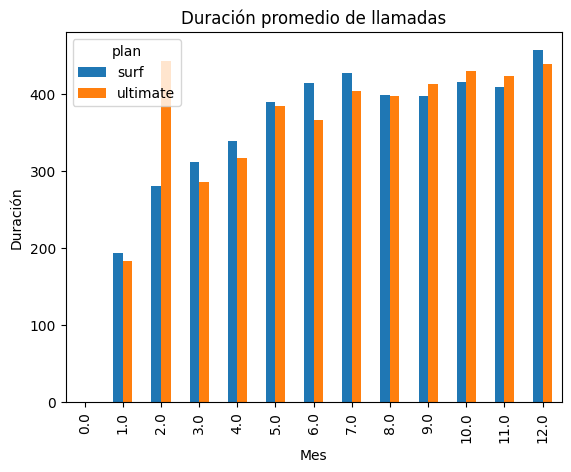

In [43]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

prom = data.groupby(['month','plan'])['total_mins'].mean().unstack() #unstack separa los renglones en columnas
prom.plot(kind='bar', title='Duración promedio de llamadas', xlabel='Mes', ylabel='Duración')

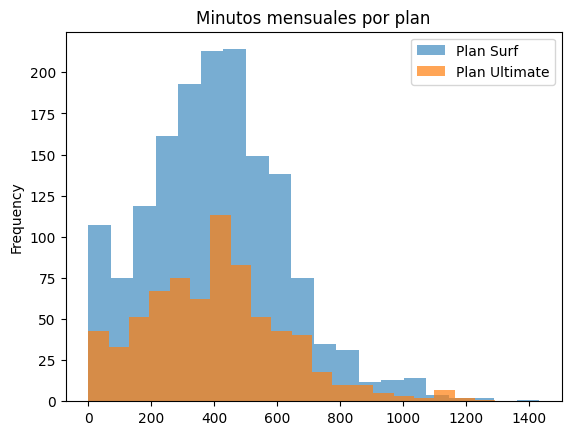

In [44]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

data[data['plan'] == 'surf']['total_mins'].plot(kind='hist', bins=20, alpha=0.6, title='Minutos mensuales por plan')
data[data['plan'] == 'ultimate']['total_mins'].plot(kind='hist',bins=20, alpha=0.7)
plt.legend(['Plan Surf', 'Plan Ultimate'])
#minutos_mensuales

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [45]:
# Calcula la media y la varianza de la duración mensual de llamadas.

media = data.groupby('month')['total_mins'].mean()
varianza= data.groupby('month')['total_mins'].var()
print('La media de la duración mensual de llamadas es: \n', media)
print()
print('La varianza de la duración mensual de llamadas es: \n', varianza)

La media de la duración mensual de llamadas es: 
 month
0.0       0.000000
1.0     186.833333
2.0     346.333333
3.0     302.771429
4.0     332.342857
5.0     388.184466
6.0     399.028777
7.0     420.157303
8.0     398.409692
9.0     402.481884
10.0    420.592814
11.0    414.059850
12.0    451.773420
Name: total_mins, dtype: float64

La varianza de la duración mensual de llamadas es: 
 month
0.0         0.000000
1.0     12004.166667
2.0     50999.809524
3.0     38309.416807
4.0     40246.257557
5.0     47383.171521
6.0     37194.767282
7.0     57219.195455
8.0     46059.977428
9.0     43310.563307
10.0    44976.776645
11.0    46321.136409
12.0    53807.616672
Name: total_mins, dtype: float64


<AxesSubplot:title={'center':'total_mins'}, xlabel='plan'>

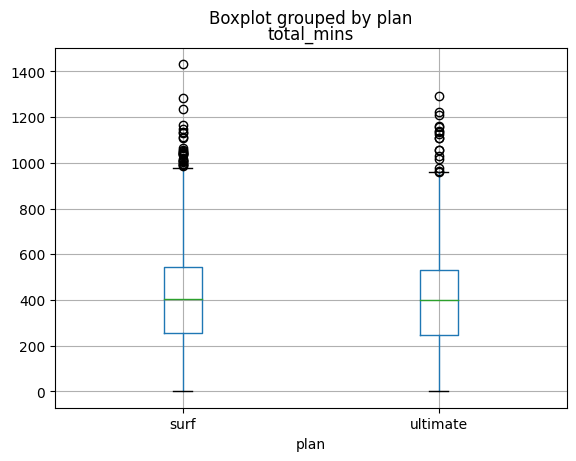

In [46]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

data.boxplot(column='total_mins', by='plan')

En cuanto a la duración promedio, podemos observar que ambos planes se encuentran bastante parejos, sin embargo, el plan surf sobrepasa la duración, por encima del plan ultimate, lo que nos muestra que aunque se encuentran en general bastante parejas, aún así la duración del plan surf es más alta que el plan ultimate.

En cuanto a los minutos mensuales por plan, podemos observar que aunque hay sesgo en ambos planes, se visualiza que los usuarios del plan surf ocupan más minutos mensuales, por encima del plan ultimate, y esta diferencia se puede ver que es bastante considerable.

La distribución de la duración mensual de llamadas, se puede ver que es bastante pareja, aunque hay bastante sesgo, según visualizamos en el diagrama de caja, aún así el plan surf cuenta con ligeramente con mayor duración en las llamadas que realiza el usuario.

Lo que podemos ver en general, en cuanto a las llamadas, es que los ususarios del plan surf realizan más llamadas y con mayor duración que los usuarios del plan ultimate, en este caso es más rentable el plan surf, para el tema de las llamadas.

### Mensajes

<AxesSubplot:xlabel='month'>

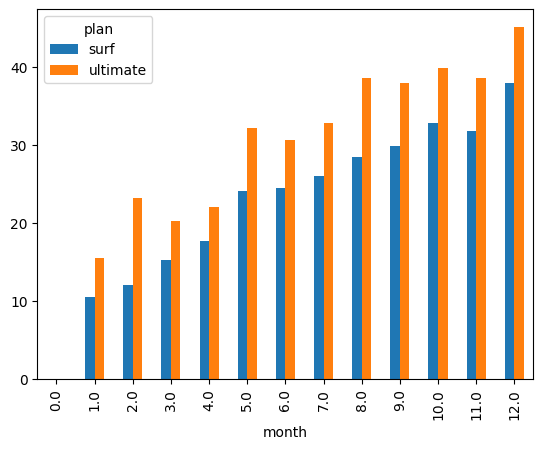

In [47]:
# Comprara el número de mensajes promedio que tienden a enviar cada mes los usuarios de cada plan

prom_msg = data.groupby(['month','plan'])['total_msg'].mean().unstack() #unstack separa los renglones en columnas
prom_msg.plot(kind='bar')

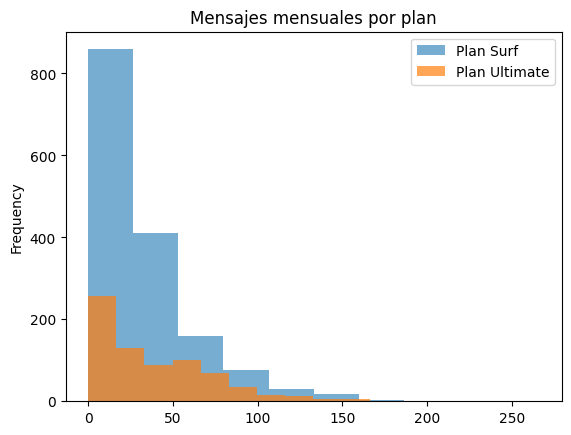

In [48]:
#Comparación de la cantidad de mensajes enviados por usuario por plan

data[data['plan'] == 'surf']['total_msg'].plot(kind='hist', bins=10, alpha=0.6, title='Mensajes mensuales por plan')
data[data['plan'] == 'ultimate']['total_msg'].plot(kind='hist',bins=10, alpha=0.7)
plt.legend(['Plan Surf', 'Plan Ultimate'])

In [49]:
#Cálculo de la media y la varianza de los mensajes enviados por mes

media_msg = data.groupby('month')['total_msg'].mean()
varianza_msg= data.groupby('month')['total_msg'].var()
print('La media de los mensajes enviados es: \n', media_msg)
print()
print('La varianza de los mensajes enviados es:', varianza_msg)

La media de los mensajes enviados es: 
 month
0.0      0.000000
1.0     13.833333
2.0     16.466667
3.0     16.971429
4.0     18.957143
5.0     26.300971
6.0     26.374101
7.0     28.275281
8.0     31.590308
9.0     32.358696
10.0    34.988024
11.0    33.915212
12.0    40.193900
Name: total_msg, dtype: float64

La varianza de los mensajes enviados es: month
0.0        0.000000
1.0      238.966667
2.0      449.980952
3.0      441.734454
4.0      516.157557
5.0      988.447744
6.0      831.105411
7.0      869.454866
8.0     1062.632295
9.0      995.336324
10.0    1235.759616
11.0    1096.167793
12.0    1481.147910
Name: total_msg, dtype: float64


<AxesSubplot:title={'center':'total_msg'}, xlabel='plan'>

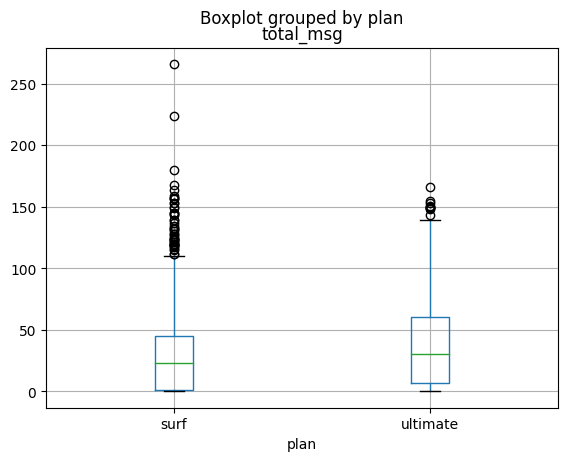

In [50]:
#Diagrama de caja para visualizar la distribución de los mensajes enviados

data.boxplot(column='total_msg', by='plan')

En cuanto a los mensajes, se puede observar en el diagrama de barras, que es mayor promedio que se envían en el plan ultimate, por encima del plan surf en todos los meses, sin embargo en el histograma, nos muestra que los usuarios del plan surf son los que mas cantidad de mensajes envías, aunque se puede observar que hay algo se sesgo, un punto que se puede observar en el diagrama de caja, el cual nos muestra que hay un mayor sesgo en el plan surf y este es bastante considerable, que en el plan ultimate, en donde también se encuentra sesgo, pero en menor cantidad, y en ambos casos podemos observar que hay una asimetría de distribución considerable, ya que hay bastantes datos en entre el Q3 y el valor máximo. Sin embargo, esto hace más sentido con el diagrama de barras, lo que nos muestra que en el caso de los mensajes, los usuarios del plan ultimate suelen utilizarlos en mayor medida que los usuarios del plan surf.

### Internet

<AxesSubplot:xlabel='month'>

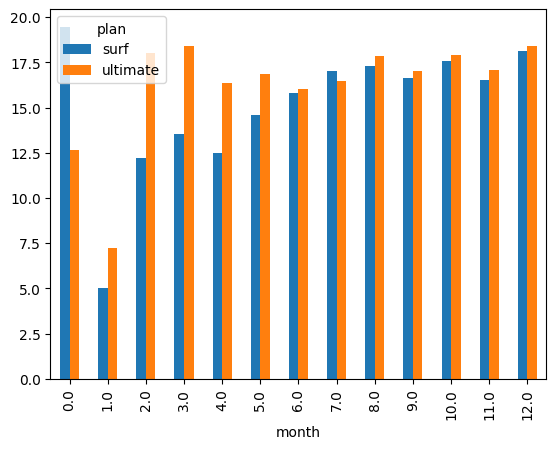

In [51]:
#Comparación de el número mb consumidos por los usuarios cada mes de cada plan

prom_internet = data.groupby(['month','plan'])['total_mb'].mean().unstack() #unstack separa los renglones en columnas
prom_internet.plot(kind='bar')

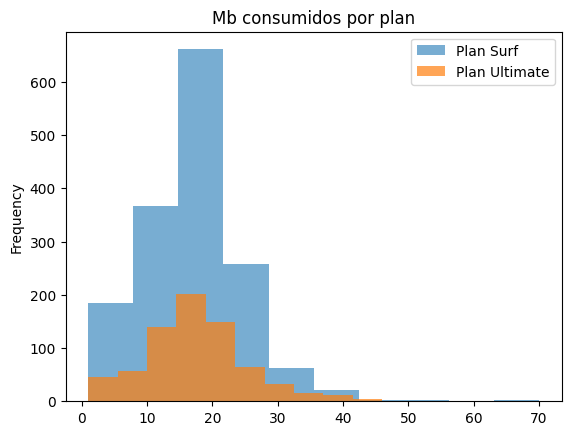

In [52]:
#Comparación de la cantidad de mb consumidos por usuario por plan

data[data['plan'] == 'surf']['total_mb'].plot(kind='hist', bins=10, alpha=0.6, title='Mb consumidos por plan')
data[data['plan'] == 'ultimate']['total_mb'].plot(kind='hist',bins=10, alpha=0.7)
plt.legend(['Plan Surf', 'Plan Ultimate'])

In [53]:
#Cálculo de la media y la varianza de los mb consumidos por mes

media_mb = data.groupby('month')['total_mb'].mean()
varianza_mb= data.groupby('month')['total_mb'].var()
print('La media de Mb consumidos por mes es: \n', media_mb)
print()
print('La varianza de Mb consumidos por mes es:\n', varianza_mb)

La media de Mb consumidos por mes es: 
 month
0.0     18.264706
1.0      6.500000
2.0     14.533333
3.0     15.228571
4.0     13.628571
5.0     15.213592
6.0     15.877698
7.0     16.842697
8.0     17.458150
9.0     16.750000
10.0    17.670659
11.0    16.685786
12.0    18.230937
Name: total_mb, dtype: float64

La varianza de Mb consumidos por mes es:
 month
0.0     197.533868
1.0      13.900000
2.0      46.980952
3.0      91.710924
4.0      65.773085
5.0      55.267657
6.0      50.093629
7.0      61.172856
8.0      64.328993
9.0      46.428182
10.0     55.122440
11.0     51.071022
12.0     59.348298
Name: total_mb, dtype: float64


<AxesSubplot:title={'center':'total_mb'}, xlabel='plan'>

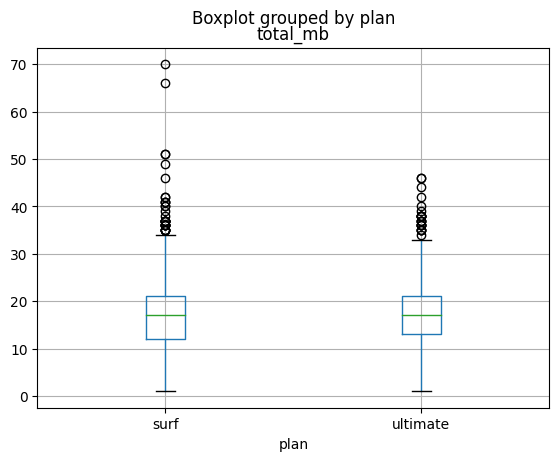

In [54]:
#Diagrama de caja para visualizar la distribución de los Mb consumidos

data.boxplot(column='total_mb', by='plan')

Aunque se puede visualizar que hay valores atípicos en la distribución, podemos observar que los usuarios del plan surf consumen más internet por encima de los usuarios del plan ultimate, podemos observar que la media de mb consumidos en ambos planes ronda los 18,000 mb aproximadamente, ocupando entre un rango aproximado entre los 12,000 a 21,000 mb que la mayoría de los usuarios consumen.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

<AxesSubplot:title={'center':'Ingresos mensuales por plan'}, xlabel='month'>

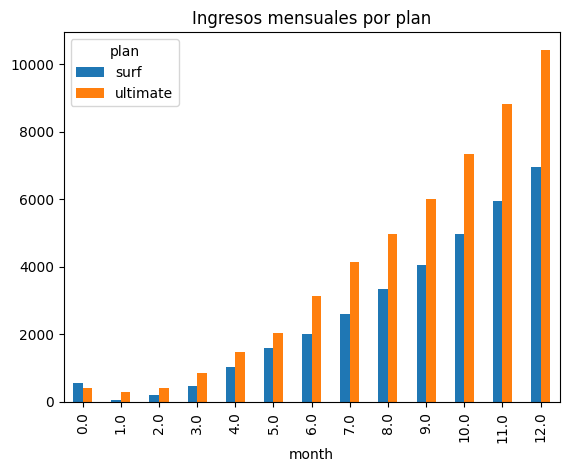

In [55]:
#Ingresos de cada plan, por mes

media_ingreso= data.groupby(['month','plan'])['costo_final'].sum().unstack()
media_ingreso.plot(kind='bar', title='Ingresos mensuales por plan')
#media_ingreso

In [56]:
#Cálculo de la media y la varianza de los mb consumidos por mes

media_ingresos = data.groupby("plan")['costo_final'].mean()
varianza_ingresos = data.groupby('plan')['costo_final'].sum()
print('La media de los ingresos por plan es: \n', media_ingresos)
print()
print('La varianza de los ingresos por plan es:\n', varianza_ingresos)

La media de los ingresos por plan es: 
 plan
surf        21.673569
ultimate    70.000000
Name: costo_final, dtype: float64

La varianza de los ingresos por plan es:
 plan
surf        33767.42
ultimate    50330.00
Name: costo_final, dtype: float64


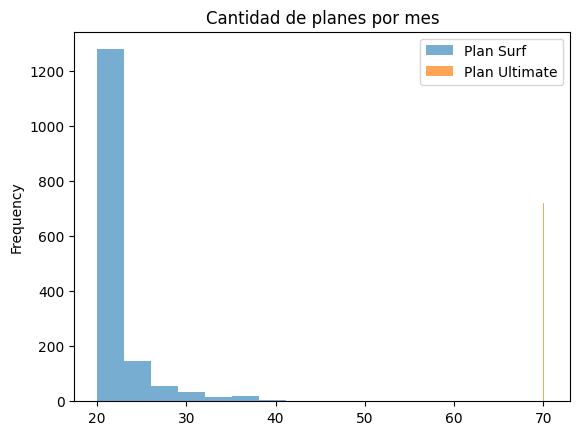

In [57]:
#Cantidad de planes por mes

data[data['plan'] == 'surf']['costo_final'].plot(kind='hist', bins=10, alpha=0.6, title='Cantidad de planes por mes')
data[data['plan'] == 'ultimate']['costo_final'].plot(kind='hist',bins=10, alpha=0.7)
plt.legend(['Plan Surf', 'Plan Ultimate'])

<AxesSubplot:title={'center':'costo_final'}, xlabel='plan'>

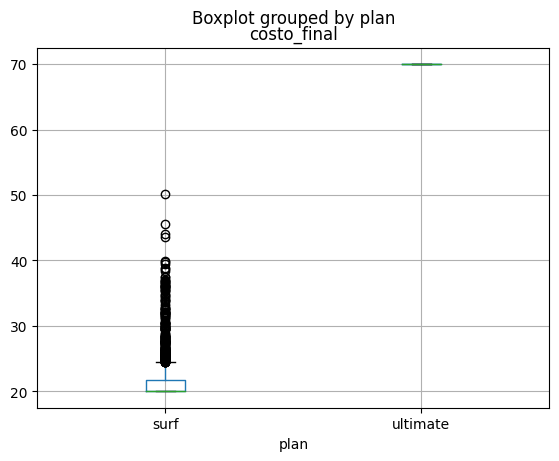

In [58]:
data.boxplot(column='costo_final', by='plan')

Se observa una cantidad de valores atípicos, sin embargo, se puede observar que una cantidad bastante considerable de los ingresos se dan por parte del plan surf, muy por encima del plan ultimate, podemos observar que es más contratado y en dicho plan también observamos que se utilizan bastante los servicios que este contiene. Se podría intuir que los usuarios prefieren y contratan más el plan surf.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [59]:
# Prueba las hipótesis

plan_surf = data.query("plan == 'surf'")['costo_final']
plan_ultimate = data.query("plan == 'ultimate'")['costo_final']

#print('La media del plan Surf es: ', plan_surf)
#print('La media del plan Ultimate es: ', plan_ultimate)

alpha=0.05

resultado_ingresos = st.ttest_ind(plan_surf,plan_ultimate)
print('valor-p:', resultado_ingresos.pvalue)

if resultado_ingresos.pvalue < alpha:
    print("Se rechaza la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

valor-p: 0.0
Se rechaza la hipótesis nula


/tmp/ipykernel_186/1521276794.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  resultado_ingresos = st.ttest_ind(plan_surf,plan_ultimate)


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [60]:
# Prueba las hipótesis

merge_info = data.merge(df_users, on='user_id')
merge_info = merge_info.drop('first_name', axis ='columns')
merge_info = merge_info.drop('last_name', axis ='columns')
merge_info = merge_info.drop('age', axis ='columns')
merge_info = merge_info.drop('reg_month', axis ='columns')
merge_info = merge_info.drop('reg_day', axis ='columns')

contain_city = merge_info[merge_info['city'].str.contains('NY-NJ')]
not_contain_city = merge_info.query('city not in @contain_city.city')

contain_city = contain_city['costo_final']
not_contain_city = not_contain_city['costo_final']

#print('La media de ingresos en NY-NJ: ', contain_city)
#print('La media de ingresos de otras regiones: ', not_contain_city)

alpha=0.05

resultado_ingresos = st.ttest_ind(contain_city,not_contain_city)
print('valor-p:', resultado_ingresos.pvalue)

if resultado_ingresos.pvalue < alpha:
    print("Se rechaza la hipótesis nula")
else:
    print("No se puede rechazar la hipótesis nula")

valor-p: 6.186426027962109e-12
Se rechaza la hipótesis nula


## Conclusión general

Podemos observar que el comportamiento de los usuarios difiere del plan surf al plan ultimate, observando que la mayoría de los usuarios contratan en mayor cantidad el plan surf, se intuye que esto puede deberse a que el plan surf es más económico y aunque en menor cantidad, tiene los mismos servicios que el plan ultimate, probablemente el usuario prefiera contratar el plan económico y gestionar los servicios, que un plan más costoso, con los mismos servicios, pero que también probablemente no los consuma al 100%, por lo que pudiera percibir un desperdicio no necesario. Conforme al gasto de los servicios, nos pudimos dar cuenta que ambos planes se consumen en buena cantidad tanto llamadas, mensajes, internet.

Podemos concluir diciendo que conforme a los ingresos que generan cada uno de los planes, y uso, es más rentable el plan surf.